# Proyecto: Análisis de mercado inmobiliario

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.


### 1. Pensando como una Data Scientist
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

- Ubicación geográfica de las propiedades, como barrio, localidad,  provincia, código postal, coordenadas geográficas. 
- Características de las propiedades: tipo (casa, departamento, cochera, etc.), cantidad de dormitorios y ambientes, características como balcón, garage, etc.
- Precios de diferentes propiedades en las ciudades de referencia del estudio inmobiliario.

Datos como los anteriores describen distintas características de las propiedades que influyen en el precio de éstas y que es en definitiva nuestro objetivo a predecir.  

### 2. Análisis exploratorio de datos

Este dataset proviene del sitio web de Properati, una plataforma web de búsqueda de inmuebles con presencia en varios países de América Latina donde se publican además de anuncios, información para tomar  decisiones como precios, características de los barrios y propiedades, comparaciones, etc. Su área de datos disponibiliza en forma abierta datasets con diferentes tipos de datos. 

Importamos las librerías necesarias para trabajar nuestro dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset y observamos sus cinco primeras filas o instancias. 

In [2]:
_df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
_df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Nos aseguramos de que se trata de un Dataframe con el que podremos trabajar:

In [3]:
print(type(_df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
print(_df.shape)

(146660, 19)


Con la anterior línea de código vemos que el dataset de Properati se compone de 146660 observaciones o instancias y 19 columnas. 

Para tener un primer pantallazo de las columnas numéricas:

In [5]:
_df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


También podemos ver un poco de estadística básica referida a las variables categóricas: 

In [6]:
_df.describe(include = ['O'])

,start_date,end_date,created_on,l1,l2,l3,currency,title,description,property_type,operation_type
count,146660,146660,146660,146660,146660,146660,146660,146660,146660,146660,146660
unique,366,412,366,1,4,89,1,77733,106668,10,1
top,2019-07-31,9999-12-31,2019-07-31,Argentina,Capital Federal,Palermo,USD,DEPARTAMENTO EN VENTA,EDIFICIO DE CATEGORIA CON MATERIALES Y ACCESOR...,Departamento,Venta
freq,11022,25101,11022,146660,92539,13073,146660,5064,235,107326,146660


Para saber el nombre del total de columnas:

In [7]:
_df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

A partir de lo que podemos inferir de los nombres de las variables y la información en el sitio web de Properati, vemos que las columnas que componen el dataset representan: 
- start_date - Fecha de alta del aviso
- end_date - Fecha de baja del aviso
- created_on - Fecha de alta de la primera versión del aviso 
- lat - Latitud 
- lon - Longitud 
- l1 - País 
- l2 - Provincia
- l3 - Barrio
- rooms - Cantidad de ambientes 
- bedrooms - Cantidad de dormitorios
- bathrooms - Cantidad de baños
- surface_total - Superficie total en m²
- surface_covered - Superficie cubierta en m²
- price - Precio publicado en el anuncio
- currency - Moneda del precio publicado
- title - Título del anuncio
- description - Descripción del anuncio
- property_type - Tipo de propiedad 
- operation_type - Tipo de operación 

Vamos a empezar a analizar cada una de las columnas por separado.

La primera columna que investigaremos es el **tipo de propiedad**. 
Si quisiéramos verlo en forma de tabla:

In [8]:
_prop = _df.property_type.value_counts()
print(_prop)

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


O lo que es lo mismo, gráficamente:

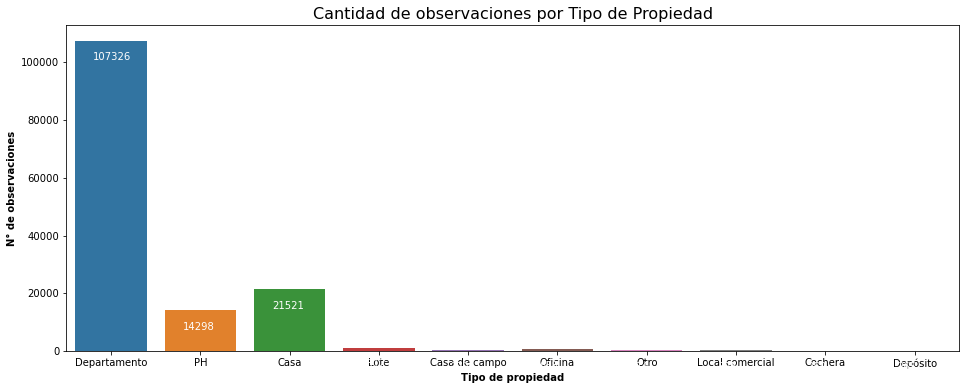

In [9]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x = _df['property_type'], data = _df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='top', color='white', size=10)
plt.title('Cantidad de observaciones por Tipo de Propiedad', size = 16)
plt.xlabel('Tipo de propiedad', fontweight = "bold")
plt.ylabel('N° de observaciones', fontweight = "bold")
plt.show()

Ahora que sabemos que las propiedades más usuales son Departamento, Casa y PH, seguidas de Lotes, Oficinas, entre otras. Una forma más interesante de observarlo sería con un gráfico de torta que nos muestre el porcentaje de las propiedades en el total.

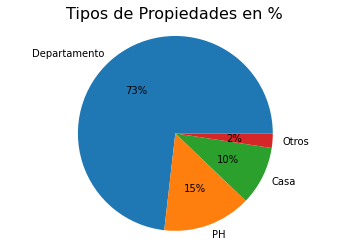

In [10]:
my_data = [107326, 21521, 14298, 3515]
my_labels = 'Departamento', 'PH', 'Casa', 'Otros'
plt.pie(my_data,labels=my_labels,autopct='%1.0f%%')
plt.title('Tipos de Propiedades en %',size = 16)
plt.axis('equal')
plt.show()

Esto se condice con lo que vemos en la siguiente tabla de frecuencias relativas:

In [11]:
_prop_rel = round((_df.property_type.value_counts() / len(_df))*100)
print(_prop_rel)

Departamento       73.0
Casa               15.0
PH                 10.0
Lote                1.0
Oficina             0.0
Otro                0.0
Local comercial     0.0
Casa de campo       0.0
Depósito            0.0
Cochera             0.0
Name: property_type, dtype: float64


Más del 70% de las observaciones del dataset corresponden a Departamentos, un 15% a PHs y 10% a Casas.

Ahora investigamos la variable **l2**:

In [12]:
_areas = _df['l2'].unique()
print('Las distintas áreas son ' + str(_areas).replace('[', '').replace(']', ''))

Las distintas áreas son 'Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste'


Observamos las cantidades de observaciones que corresponden a cada una de las áreas.

In [13]:
values = (_df['l2'].value_counts())
print(values)

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


Y observamos esto gráficamente:

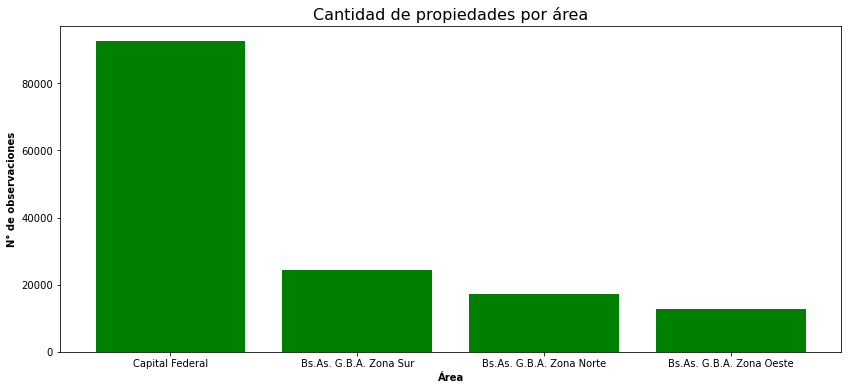

In [14]:
plt.figure(figsize=(14, 6))
ax = plt.bar(x = _areas, height = values, color = 'g')
plt.title('Cantidad de propiedades por área', size = 16)
plt.xlabel("Área", fontweight = "bold")
plt.ylabel("N° de observaciones", fontweight = "bold")
plt.show()

Podríamos preguntarnos por qué no está entre las observaciones Zona Este. Esta respuesta la conocemos si tenemos familiareidad con el país, o simplemente observamos el mapa de Argentina. Buenos Aires limita al este con el Río de la Plata, por lo que sólo crece en estas tres direciones: Norte, Sur y Oeste.

Veremos ahora la variable **l3**, que hace referencia a los barrios de la Ciudad de Buenos Aires y las localidades de Zona Sur, Norte y Oeste.

In [15]:
_barrios = _df['l3'].unique()
print(_barrios)
values = (_df['l3'].value_counts())
print(values)

['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'
 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'
 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' 'Saavedra'
 'Villa Santa Rita' 'Barracas' 'Villa Lugano' 'Constitución' 'Mataderos'
 'Villa Devoto' 'Parque Avellaneda' 'Villa del Parque'
 'Esteban Echeverría' 'Lomas de Zamora' 'Almirante Brown' 'Ezeiza'
 'San Vicente' 'Berazategui' 'Quilmes' 'Malvinas Argentinas' 'José C Paz'
 'Escobar' 'Moreno' 'General Rodríguez' 'Monte Cast

Al ser 89 los valores distintos posibles de esta columna, es mejor observarlo gráficamente.

Text(0, 0.5, 'Barrio')

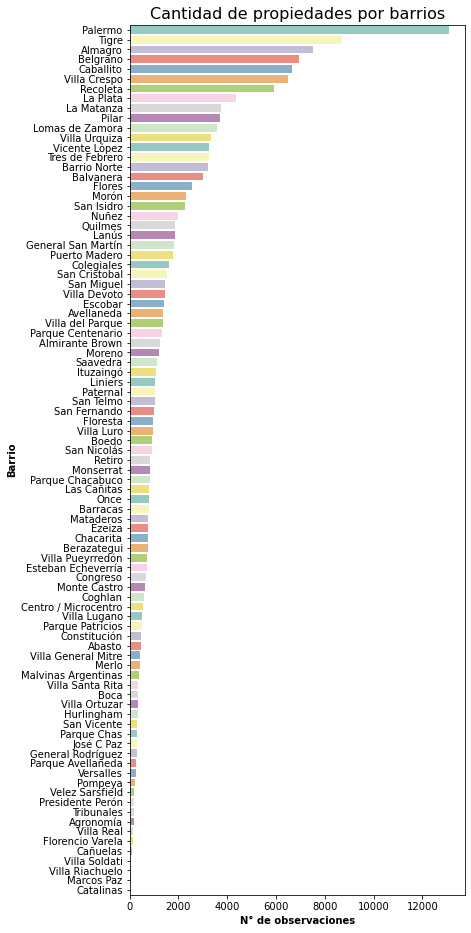

In [16]:
plt.figure(figsize=(6, 16))
sns.countplot(data = _df, y ='l3', order = _df['l3'].value_counts().index, palette="Set3")
plt.title('Cantidad de propiedades por barrios', size = 16)
plt.xlabel("N° de observaciones", fontweight = "bold")
plt.ylabel("Barrio", fontweight = "bold")

La visualización anterior nos analiza todos los barrios de Capital Federal y localidades del Gran Buenos Aires juntos. Sería aún más interesante poder ver la cantidad de propiedades al interior de Capital Federal y de cada zona por separado.  

En primer lugar, observamos qué pasa en Capital Federal:

Text(0, 0.5, 'N° de observaciones')

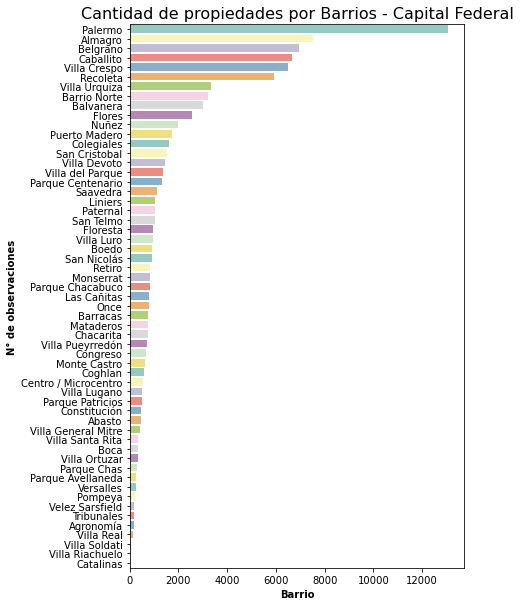

In [17]:
plt.figure(figsize=(6, 10))
_df2 = _df.loc[_df['l2']=='Capital Federal']
sns.countplot(data = _df2, y ='l3', order = _df2['l3'].value_counts().index, 
              palette="Set3")
plt.title('Cantidad de propiedades por Barrios - Capital Federal', size = 16)
plt.xlabel("Barrio", fontweight = "bold")
plt.ylabel("N° de observaciones", fontweight = "bold")

Y luego en cada una de las zonas.

<ipython-input-18-8f37e9159ea5>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,1)


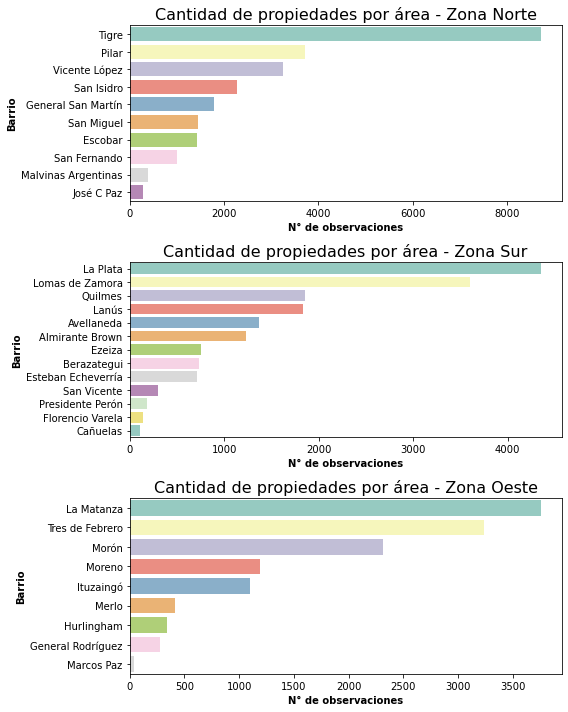

In [18]:
plt.figure(figsize = (8,10))
plt.subplot(3,1,1) ## 1 fila, 3 col, grafico 1 
#plt.figure(figsize=(6, 10))

plt.subplot(3,1,1) 
plt.title('Cantidad de propiedades por área - Zona Norte', size = 16)
_df_norte = _df.loc[_df['l2']=='Bs.As. G.B.A. Zona Norte']
sns.countplot(data = _df_norte, y ='l3', order = _df_norte['l3'].value_counts().index, 
              palette="Set3")
plt.xlabel("N° de observaciones", fontweight = "bold")
plt.ylabel("Barrio", fontweight = "bold")

plt.subplot(3,1,2)
plt.title('Cantidad de propiedades por área - Zona Sur', size = 16)
_df_sur = _df.loc[_df['l2']=='Bs.As. G.B.A. Zona Sur']
sns.countplot(data = _df_sur, y ='l3', order = _df_sur['l3'].value_counts().index, 
              palette="Set3")
plt.xlabel("N° de observaciones", fontweight = "bold")
plt.ylabel("Barrio", fontweight = "bold")

plt.subplot(3,1,3)
plt.title('Cantidad de propiedades por área - Zona Oeste', size = 16)
_df_oeste = _df.loc[_df['l2']=='Bs.As. G.B.A. Zona Oeste']
sns.countplot(data = _df_oeste, y ='l3', order = _df_oeste['l3'].value_counts().index, 
              palette="Set3")
plt.xlabel("N° de observaciones", fontweight = "bold")
plt.ylabel("Barrio", fontweight = "bold")

plt.tight_layout()
plt.show()

Con esta información ya podemos hacer un gran filtro del dataset y enfocar nuestra atención y análisis en los 3 tipos de propiedades con más observaciones, Departamentos, PHs y Casas, ubicados dentro del área con mayor número de propiedades: Capital Federal.

In [19]:
_df2 = _df.loc[(_df['property_type']=='Departamento') | (_df['property_type']=='PH') |(_df['property_type']=='Casa')]
_df = _df2.loc[_df2['l2']=='Capital Federal']

In [20]:
_df.shape

(91485, 19)

Se cumple el primer **checkpoint**.

Además ya podemos desprendernos de algunas columnas que a priori no nos serán útiles. En el caso de que las necesitemos siempre podemos volver a incorporarlas al dataset con los cuidados necesarios.

In [21]:
_df = _df.drop(columns = ['start_date','end_date', 'created_on', 'lat', 'lon', 'title', 'description'], axis = 1)

Podemos desprendernos de algunas otras pero por las dudas chequeamos antes:

In [22]:
_df.l1.value_counts()

Argentina    91485
Name: l1, dtype: int64

In [23]:
_df.currency.value_counts()

USD    91485
Name: currency, dtype: int64

In [24]:
_df['operation_type'].value_counts()

Venta    91485
Name: operation_type, dtype: int64

Vemos que todas las propiedades corresponden a Argentina, todos los valores de precios se encuentran en USD, y además todas las operaciones corresponden a venta de propiedades por lo que también podemos deshacernos de estas columnas.

In [25]:
_df = _df.drop(columns = ['l1', 'currency', 'operation_type'], axis = 1 )

Además, vamos a renombrar l2 ya que no se trata de una provincia o estado subnacional si no que todos los registros corresponden a la provincia de Bs. As. Por un lado, Capital Federal refiere a la Ciudad de Buenos Aires, mientras que el resto son regiones que conforman el Gran Buenos Aires, un conjunto de ciudades que rodean a la Ciudad de Buenos Aires. 
Un nombre más adecuado para esta columna sería área. Sin embargo, continuamos la convención de los nombres en inglés. Además, renombramos l3 para facilitar el análisis.

In [26]:
_df = _df.rename(columns={'l2' : 'area', 'l3' : 'neighb'})

Chequeamos de cuántas columnas quedó finalmente nuestro dataset.

In [27]:
_df.shape

(91485, 9)

Ahora procedemos a investigar cada una de las columnas que componen nuestro dataset.

In [28]:
_df.dtypes

area                object
neighb              object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
property_type       object
dtype: object

In [29]:
_df.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


La cantidad de valores faltantes en cada una de estas columnas:

In [30]:
_df.isna().sum()

area                  0
neighb                0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64

Para tener una idea de cuánto representan estos valores faltantes en relación a la totalidad del dataset:

In [31]:
round((_df.isna().sum() / len(_df))*100, 0)

area                0.0
neighb              0.0
rooms               0.0
bedrooms            0.0
bathrooms           2.0
surface_total      10.0
surface_covered    10.0
price               0.0
property_type       0.0
dtype: float64

Es decir, el 2% de las propiedades tiene valores vacíos en la cantidad de baños, el 10% de las filas tiene vacíos en la superficie total y el 10% lo tiene en la superficie cubierta.

Ahora vamos a explorar un poco el dataset.

Esta primera línea nos va a dar una idea muy general de las relaciones lineales presentes entre las distintas variables que componen el dataset. No será muy informativo pero siempre es interesante darle una mirada.

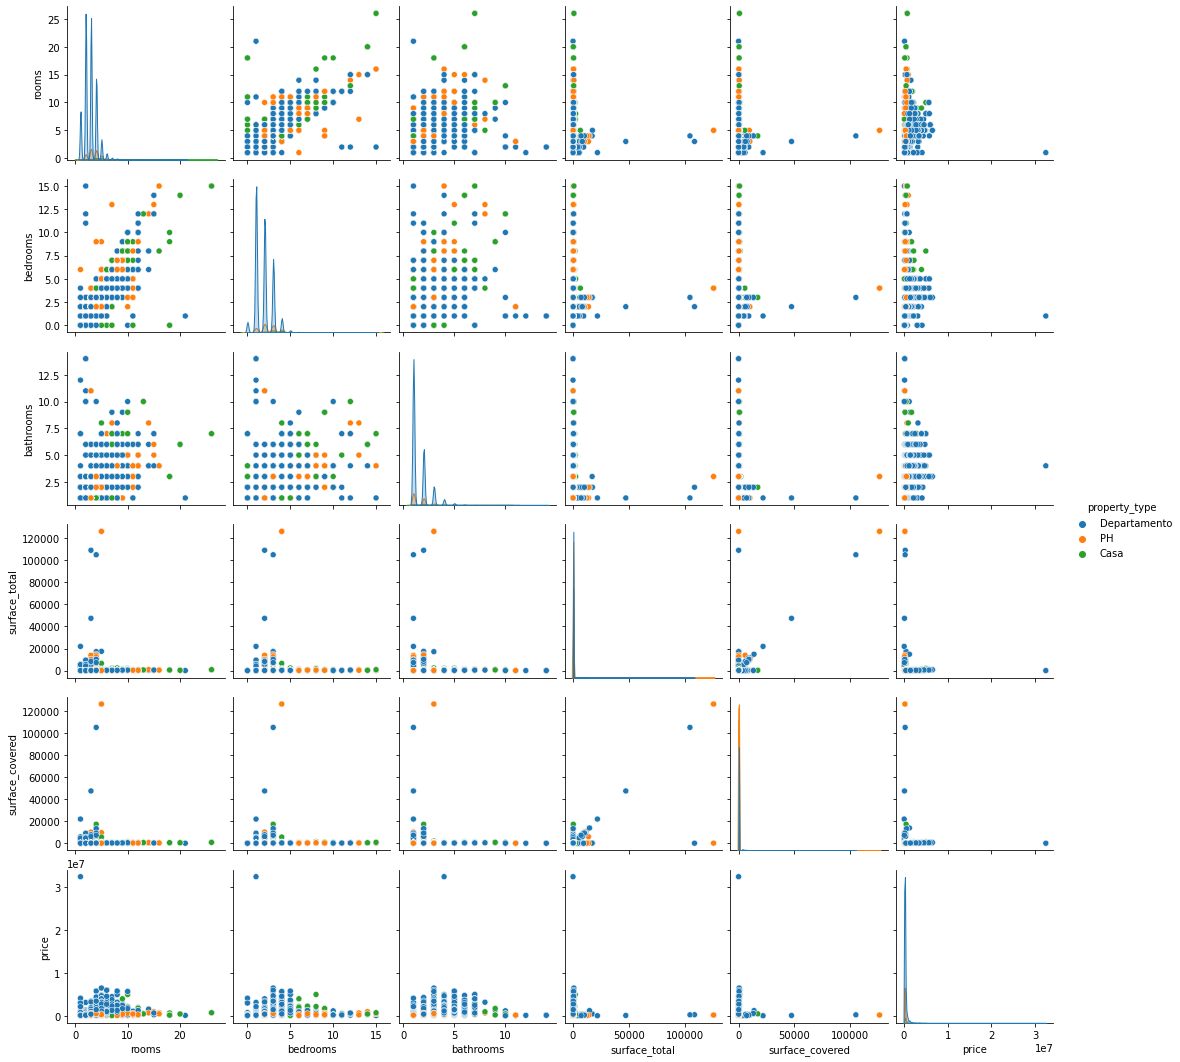

In [32]:
sns.pairplot(_df, hue = 'property_type')

Trabajamos en primer lugar con la variable **price**. 
En la tabla de estadísticas básicas vemos que el precio promedio de las propiedades del dataset es de 259.000 USD, y el desvío estandar es de 322.265 USD, es decir que en promedio las propiedades difieren del valor medio en +/-322.265 USD. El valor mínimo es de 6000USD y el máximo de 3,2 millones. 
Para ver esto en forma gráfica, podemos graficar un histograma de la variable.
Deberíamos elegir un límite de precio tal que nos permita tener una idea concreta de la distribución y dejar por fuera outliers o valores extremos. Considerando que el 75% de las observaciones se encuentra por debajo de 279.000 USD, y que el 90% de las observaciones se encuenta por debajo de  460.000 USD, elijo ese límite como filtro del dataset.

In [33]:
_df['price'].quantile(0.90)

460000.0

In [34]:
_df_filt = _df[_df['price'] < _df['price'].quantile(0.90)]

Text(0, 0.5, 'N° de oservaciones')

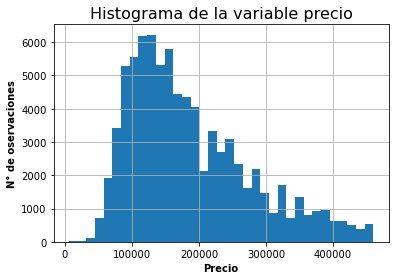

In [35]:
_df_filt['price'].hist(bins=35)
plt.title('Histograma de la variable precio', size = 16)
plt.xlabel('Precio', fontweight = 'bold')
plt.ylabel('N° de oservaciones', fontweight = 'bold')

Otra forma de observar la distribución de esta variable es hacer un boxplot, cuyos límites de los brazos marca los valores mínimos y máximos de la variable, el cuerpo de la caja nos muestra el rango intercuartílico es decir el valor del 25% y 50% de las observaciones, y la línea que parte la caja es el valor promedio.

A pesar de ese gran filtro de la variable precio todavía existen algunos valores considerados outliers.

C:\Users\ginab\anaconda3\envs\acamica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


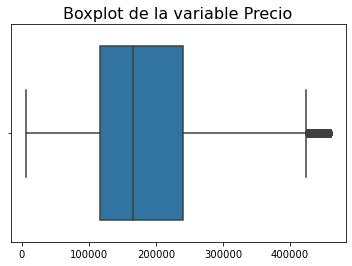

In [36]:
sns.boxplot(list(_df_filt['price']))
plt.title('Boxplot de la variable Precio', size = 16)
plt.show()

Podemos observar la distribución de la variable **precio** por tipo de propiedad. 

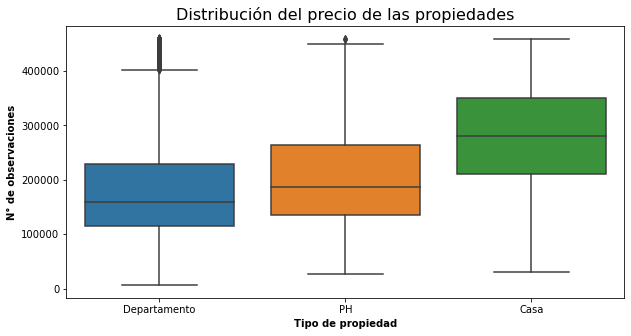

In [37]:
plt.figure(figsize = (10,5))
sns.boxplot(data = _df_filt, x = 'property_type', y = 'price')
sns.color_palette("pastel")
plt.title("Distribución del precio de las propiedades", size = 16)
plt.xlabel("Tipo de propiedad", fontweight = 'bold')
plt.ylabel("N° de observaciones", fontweight = 'bold')
plt.grid(False)

Un análisis que salta a la vista es que la distribución de la variable precio entre Departamento y PH es muy similar, mientras que los precios de las casas se encuentran en un rango mayor. Además, no existe ningún valor por debajo de 0, lo cual habla bien de la calidad de los datos.

Investigamos un poco la variable **rooms** que hace referencia a la cantidad de ambientes de las propiedades.

In [38]:
print(_df_filt['rooms'].value_counts().sort_index())

1.0      8794
2.0     27008
3.0     26911
4.0     14737
5.0      3482
6.0       780
7.0       306
8.0       163
9.0        34
10.0       39
11.0       21
12.0        7
15.0        2
18.0        3
21.0        1
Name: rooms, dtype: int64


Text(0.5, 0, 'Cantidad de habitaciones')

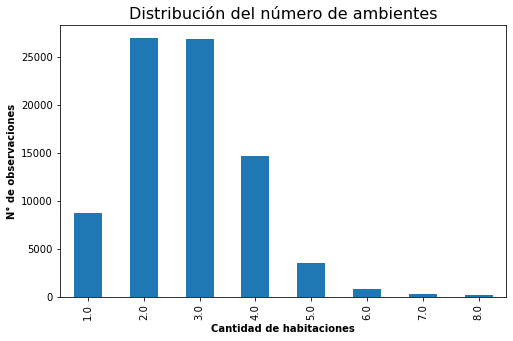

In [39]:
_df_filt['rooms'].value_counts().nlargest(8).sort_index().plot(kind='bar', figsize=(8,5))
plt.title('Distribución del número de ambientes', size = 16)
plt.ylabel('N° de observaciones', fontweight = 'bold')
plt.xlabel('Cantidad de habitaciones', fontweight = 'bold')

La mayoría de las propiedades se encuentra en el rango entre 1 y 5 ambientes, lo cual tiene sentido. Sin embargo, hay propiedades con hasta 21 ambientes. Filtraremos las propiedades con más de 8 ambientes.

In [40]:
_df_filt = _df_filt.loc[_df_filt['rooms']<=8]

In [41]:
_df_filt['rooms'].value_counts().sort_index()

1.0     8794
2.0    27008
3.0    26911
4.0    14737
5.0     3482
6.0      780
7.0      306
8.0      163
Name: rooms, dtype: int64

Si vemos la distribución de la cantidad de ambientes por tipo de propiedad, los diagramas de cajas nos muestran que Casas y PHs tienen distribuciones similares, y Departamentos tiene valores más bajos por tratarse en general de propiedades de menor tamaño.

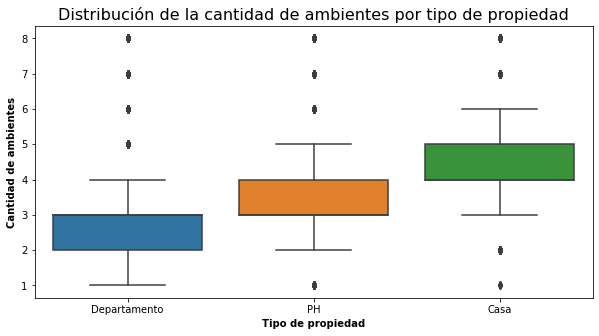

In [42]:
plt.figure(figsize = (10,5))
sns.boxplot(data = _df_filt, x = 'property_type', y = 'rooms')
sns.color_palette("pastel")
plt.title("Distribución de la cantidad de ambientes por tipo de propiedad", size = 16)
plt.xlabel("Tipo de propiedad", fontweight = 'bold')
plt.ylabel("Cantidad de ambientes", fontweight = 'bold')
plt.grid(False)

Veremos ahora la variables **bedrooms**, es decir cantidad de dormitorios:

In [43]:
_df_filt['bedrooms'].value_counts().sort_index()

0.0      2204
1.0     33778
2.0     27444
3.0     15179
4.0      2866
5.0       415
6.0       190
7.0        97
8.0         2
9.0         3
11.0        1
12.0        1
15.0        1
Name: bedrooms, dtype: int64

Por qué hay propiedades de 0 dormitorios? Son los llamados monoambientes, ya que recordemos que ninguna propiedad tiene 0 ambientes, por lo que no se trata de un error. Podemos filtrar aquellas propiedades que tienen 6 o más dormitorios. Son muy pocas en relación al total del dataset. 

In [44]:
_df_filt = _df_filt.loc[_df_filt['bedrooms']<6]

Text(0.5, 0, 'Cantidad de dormitorios')

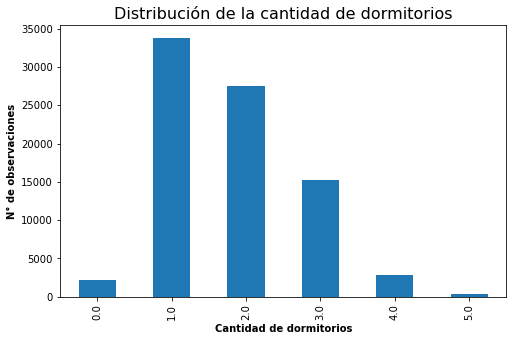

In [45]:
_df_filt['bedrooms'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))
plt.title('Distribución de la cantidad de dormitorios', size = 16)
plt.ylabel('N° de observaciones' ,fontweight = 'bold')
plt.xlabel('Cantidad de dormitorios', fontweight = 'bold')

Veamos ahora la variable **bathrooms**.

In [46]:
_df_filt['bathrooms'].value_counts().sort_index()

1.0     54344
2.0     20448
3.0      4200
4.0       768
5.0        47
6.0        12
7.0         1
10.0        4
11.0        3
12.0        1
14.0        3
Name: bathrooms, dtype: int64

Nuevamente filtraremos las propiedades con más de 5 baños.

In [47]:
_df_filt = _df_filt.loc[_df_filt['bathrooms']<6]

Text(0.5, 0, 'Cantidad de baños')

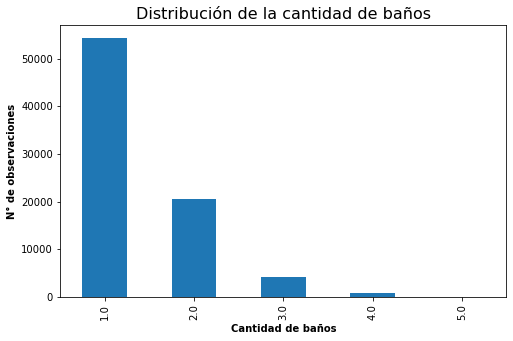

In [48]:
_df_filt['bathrooms'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))
plt.title('Distribución de la cantidad de baños', size = 16)
plt.ylabel('N° de observaciones', fontweight = 'bold')
plt.xlabel('Cantidad de baños', fontweight = 'bold')

Por último, sabemos por definición que la superficie total no puede ser mayor a la superficie cubierta, por lo que podemos empezar con este filtro.

In [49]:
_df_filt = _df_filt.loc[_df_filt['surface_covered'] < _df_filt['surface_total']]

Una vez filtrados estos valores, podemos observar nuevamente la serie de estadísticas básicas de las variables del dataset.

In [50]:
_df_filt.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,50187.000000,50187.000000,50187.000000,50187.000000,50187.000000,50187.000000
mean,2.843505,1.880268,1.432303,100.994082,73.621834,199358.382649
std,1.065493,0.886087,0.654874,801.988676,170.697269,89616.679269
min,1.000000,0.000000,1.000000,16.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,51.000000,44.000000,130000.000000
50%,3.000000,2.000000,1.000000,70.000000,60.000000,178000.000000
75%,4.000000,2.000000,2.000000,100.000000,82.000000,250000.000000
max,8.000000,5.000000,5.000000,126062.000000,10509.000000,459900.000000


Podemos observar que las variables que hasta ahora no hemos trabajado tienen distribuciones muy grandes. Aún queda trabajo por hacer con esto.

A partir de esto observamos que para el caso de la **superficie total**, la media es de 100 m2 con un desvío estandar de 801 m2. Además, el 75% de las observaciones posee una superficie menor a 100 m2 y el 85% de las observaciones se encuentra dentro de 125 m2, lo cual ya es una superficie bastante grande.

In [51]:
_df_filt['surface_total'].quantile(0.85)

125.0

In [52]:
_df_filt = _df_filt[_df_filt['surface_total'] < _df_filt['surface_total'].quantile(0.85)]

Una tinyhouse es un tipo de propiedad con una superficie promedio menor a 40m2, algo bastante pequeño como su nombre lo indica. Tomaré como referencia esto para filtrar también el dataset y analizar sólo propiedades con superficie total mayor a 40. 

In [53]:
_df_filt = _df_filt.loc[_df_filt['surface_total']> 40]

Text(0.5, 0, 'Tipo de propiedad')

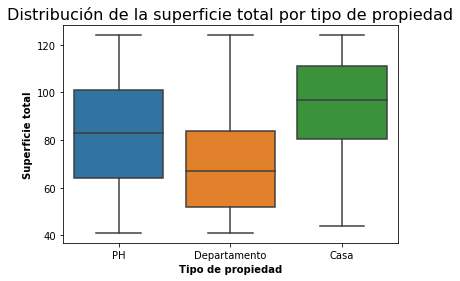

In [54]:
sns.boxplot(data = _df_filt, y = "surface_total", x = 'property_type')
plt.title('Distribución de la superficie total por tipo de propiedad', size = 16)
plt.ylabel('Superficie total' ,fontweight = 'bold')
plt.xlabel('Tipo de propiedad', fontweight = 'bold')

Podemos observar la relación existente entre las variables precios y superficie total por tipo de propiedad por medio de un gráfico de dispersión.

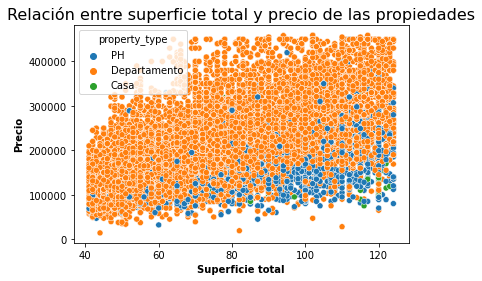

In [55]:
sns.scatterplot(x= "surface_total", y = "price", data = _df_filt, hue = 'property_type')
plt.title("Relación entre superficie total y precio de las propiedades", size = 16)
plt.xlabel("Superficie total", fontweight = "bold")
plt.ylabel("Precio", fontweight = "bold")
plt.grid(False)

Más allá de la predominante presencia de departamentos en el dataset parece haber una relación lineal positiva entre la superficie total y el precio de las propiedades.

Esperamos que la relación entre superficie cubierta y precio de las propiedades sea similar. Pero nuevamente, vamos a filtrar considerando que el 85% de las propiedades posee una superficie cubierta menor a 82 m2.

In [56]:
_df_filt['surface_covered'].quantile(0.85)

82.0

In [57]:
_df_filt = _df_filt[_df_filt['surface_covered'] < _df_filt['surface_covered'].quantile(0.85)]

Estableceré como filtro que las propiedades no tengan una superficie cubierta menor a 35 m2.

In [58]:
_df_filt = _df_filt.loc[_df_filt['surface_covered'] > 35] 

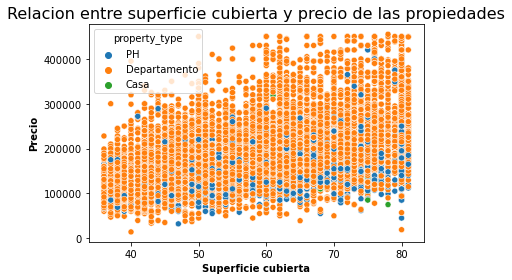

In [59]:
sns.scatterplot(x= "surface_covered", y = 'price', data = _df_filt, hue = 'property_type')
plt.title("Relacion entre superficie cubierta y precio de las propiedades", size = 16)
plt.xlabel("Superficie cubierta", fontweight = "bold")
plt.ylabel("Precio", fontweight = "bold")
plt.grid(False)

Nuevamente, observamos las relaciones entre el dataframe ya filtrado, que posee 31416 observaciones.

In [60]:
_df_filt.shape

(31416, 9)

Además, sabemos que por los filtros que hemos aplicado siempre tomando los valores más altos, la mayor cantidad de propiedades es de Departamentos y es aún más importante que antes.

In [61]:
_df_filt['property_type'].value_counts()

Departamento    28836
PH               2502
Casa               78
Name: property_type, dtype: int64

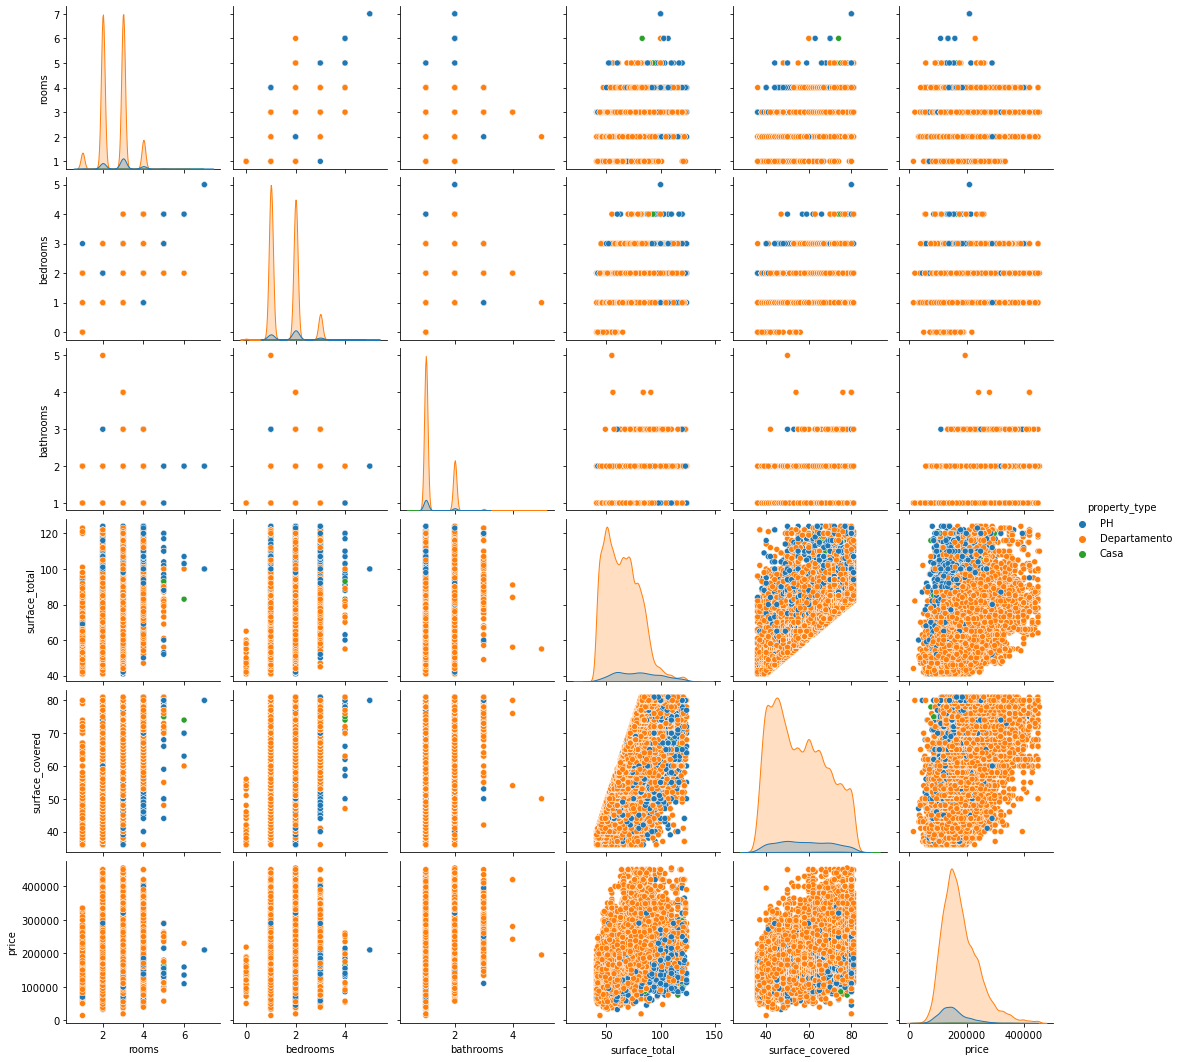

In [62]:
sns.pairplot(_df_filt, hue = 'property_type')

Ahora estamos listos para explorar la **correlación** entre las distintas variables.
Una matriz de correlación nos muestra gráficamente el grado de asociación lineal entre las distintas columnas o variables del dataset entre sí. 
Para esto, primero creamos una matriz con las correlaciones entre variables de interés


In [63]:
correlacion = _df_filt.corr()
print(correlacion)

                    rooms  bedrooms  bathrooms  surface_total  \
rooms            1.000000  0.942606   0.303416       0.594797   
bedrooms         0.942606  1.000000   0.297675       0.587894   
bathrooms        0.303416  0.297675   1.000000       0.368284   
surface_total    0.594797  0.587894   0.368284       1.000000   
surface_covered  0.721940  0.723513   0.441542       0.810542   
price            0.313875  0.299197   0.438034       0.508990   

                 surface_covered     price  
rooms                   0.721940  0.313875  
bedrooms                0.723513  0.299197  
bathrooms               0.441542  0.438034  
surface_total           0.810542  0.508990  
surface_covered         1.000000  0.559357  
price                   0.559357  1.000000  


Nuevamente, esto es más simple de interpretar en forma gráfica.

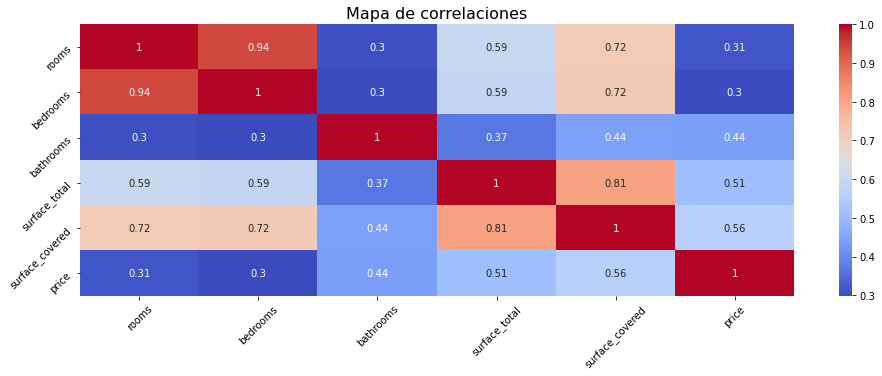

In [64]:
plt.figure(figsize = (16,5))
sns.heatmap(correlacion, annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Mapa de correlaciones', size = 16)
plt.show()

Observamos que las mejores variables para predecir el precio de las propiedades son las correspondientes a la superficie, tanto superficie cubierta como superficie total. Además, estas dos variables están altamente correlacionadas entre sí. Por otro lado, las variables correspondientes al número de dormitorios y de ambientes también tienen alto grado de correlación, por lo que una es candidata a ser excluida del análisis.

### 2.1 Desafío

Podemos extraer mucha más información del dataset de la que hasta ahora hemos analizado. Algo interesante, sería observar cuáles son los barrios que ofrecen los mayores (y menores) precios por m2, un indicador usualmente utilizado en el ámbito inmobiliario para tomar decisiones.

Para esto creamos una nueva columna que sea igual al cociente entre precio y superficie cubierta.

In [65]:
_df_filt['price_per_sqm'] = round(_df_filt['price']/_df_filt['surface_total'],0)

In [66]:
_df_filt['price_per_sqm'].describe()

count    31416.000000
mean      2717.676884
std        802.467558
min        230.000000
25%       2172.000000
50%       2617.000000
75%       3161.000000
max       7222.000000
Name: price_per_sqm, dtype: float64

Vemos que las propiedades del dataset tienen un valor medio de 2712 USD/m2 y un desvío estandar de 802 USD/m2. El valor mínimo es de 230 y el máximo de 7222. 

Vemos la distribución del precio por m2 para los distintos tipos de propiedad.

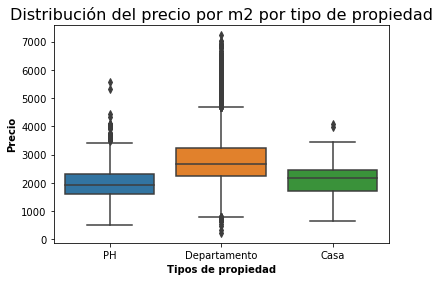

In [67]:
sns.boxplot(x="property_type", y="price_per_sqm", data= _df_filt)
plt.xlabel('Tipos de propiedad', fontweight = 'bold')
plt.ylabel('Precio', fontweight = 'bold')
plt.title('Distribución del precio por m2 por tipo de propiedad', size = 16)
plt.show()

Y ahora podemos ordenar los barrios de Capital Federal de mayor a menor precio promedio por m2.

In [68]:
df_agrup = _df_filt.groupby(['neighb']).mean()['price_per_sqm']
print(df_agrup.sort_values(ascending=False))

neighb
Puerto Madero           5175.310924
Las Cañitas             3632.478022
Palermo                 3292.513184
Belgrano                3284.450614
Nuñez                   3234.157175
Barrio Norte            3223.900488
Recoleta                3208.921397
Retiro                  2913.408163
Villa Urquiza           2796.217031
Colegiales              2780.142653
Coghlan                 2768.764493
Caballito               2613.332074
Abasto                  2585.089888
Villa Ortuzar           2576.207207
Parque Centenario       2565.890173
Saavedra                2550.924152
Chacarita               2550.455414
Almagro                 2547.137097
Villa Crespo            2489.157153
San Telmo               2475.393064
Barracas                2456.373333
Villa Pueyrredón        2433.758242
Villa del Parque        2404.512422
Villa Devoto            2352.893478
Parque Chas             2352.000000
Centro / Microcentro    2266.486111
Paternal                2247.424171
Liniers              

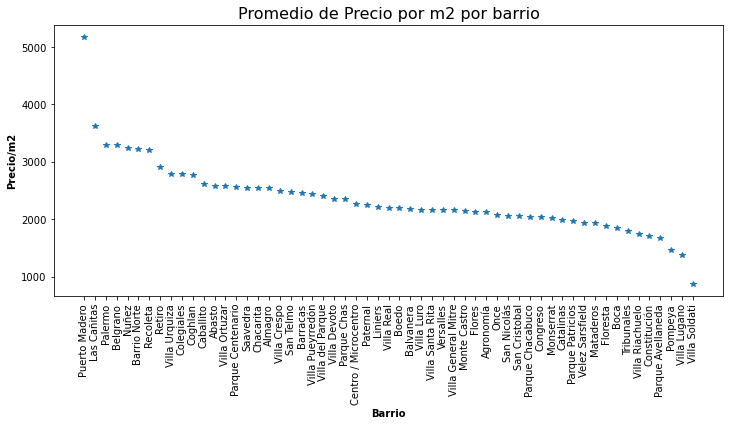

In [69]:
plt.figure(figsize=(12, 5))
plt.plot(df_agrup.sort_values(ascending=False),'*')
plt.title('Promedio de Precio por m2 por barrio', size = 16)
plt.ylabel('Precio/m2', fontweight = 'bold')
plt.xlabel('Barrio', fontweight = 'bold')
plt.xticks(rotation='vertical');
plt.show()

Los barrios de Capital Federal con precio por m2 más altos son: Puerto Madero (5175 USD/m2), Las Cañitas (3632 USD/m2), y Palermo (3292 USD/m2), y aquellos con precios más bajos son Pompeya (1467 USD/m2), Villa Lugano (1382 USD/m2), y Villa Soldati (869 USD/m2). Cabe aclarar que Puerto Madero se consolida como un outlier ya que se encuentra muy por encima del resto de los valores, incluso del segundo barrio más caro.

### 3. Machine Learning

En esta sección entrenaremos distintos modelos de machine learning que tengan como objetivo la predicción del precio de las propiedades de nuestro dataset.

Para esto primero, cargamos nuevamente el dataset y filtramos según ciertos criterios.

In [70]:
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv", parse_dates=['created_on'])
df = df[df.property_type.isin(['Departamento', 'Casa', 'PH'])] 
df = df[df.l2=='Capital Federal']
df = df[df['surface_total']<=1000]
df = df[df['surface_total']>=15]
df = df[df['price']<=4000000]
df = df.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
     'currency', 'title', 'description', 'operation_type', 'property_type'], axis =1)
df = df.dropna()
df.shape

(81019, 6)

Selecciono las variables predictoras X (features), y la variable a predecir y (etiqueta).

In [71]:
X = df.drop('price', axis = 1)
y = df.price

In [72]:
X.shape

(81019, 5)

In [73]:
y.shape

(81019,)

Separo el dataset en un conjunto de entrenamiento y un conjunto de testeo.

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state = 42)

Verificamos sus tamaños.

In [75]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(68866, 5) (68866,) (12153, 5) (12153,)


Corremos para empezar un **modelo de regresión lineal** para intentar predecir el precio de las propiedades.

In [76]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

Entrenamos el modelo sobre el conjunto de entrenamiento.

In [77]:
linear_model.fit(X_train, y_train)

LinearRegression()

Realizamos las predicciones sobre ambos conjuntos.

In [78]:
y_test_pred_lm = linear_model.predict(X_test)

y_train_pred_lm = linear_model.predict(X_train)

Elijo una métrica de evaluación del modelo. En este caso, elijo el RMSE o raíz del error cuadrático medio, cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

Esta métrica como su nombre lo indica es del error del modelo por lo que cuanto menor sea su valor mejor será el desempeño del modelo. 

In [97]:
from sklearn.metrics import mean_squared_error

train_rmse_lm =np.sqrt(mean_squared_error(y_train,y_train_pred_lm))
test_rmse_lm = np.sqrt(mean_squared_error(y_test, y_test_pred_lm))

print('El RMSE del modelo de regresión es: ' + str(round(test_rmse_lm, 2)))

El RMSE del modelo de regresión es: 201584.2


A continuación quiero analizar los errores o residuos del modelo, iguales a la diferencia entre la etiqueta predicha y la etiqueta real guardada bajo el conjunto de evaluación. Para esto puedo construir el histograma de los errores y/o un gráfico de dispersión de los errores.

C:\Users\ginab\anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ginab\anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


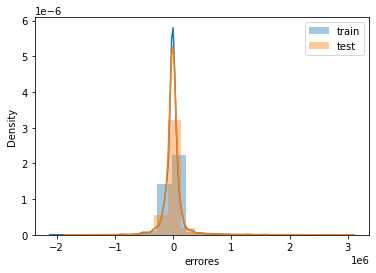

In [80]:
sns.distplot(y_train - y_train_pred_lm, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_lm, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

Vemos que los errores se distribuyen en forma aproximadamente normal alrededor de cero y que las distribuciones de train y test son similares por lo que no hay un gran sobreajuste.
Otra forma de observarlo es con un gráfico de dispersión entre los valores reales y los valores predichos por el modelo.

Text(0.5, 0, 'errores')

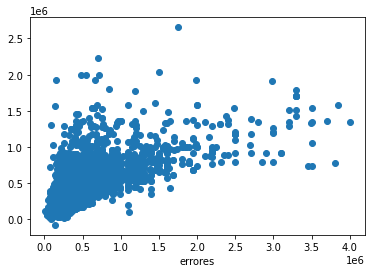

In [81]:
plt.scatter(y_test,y_test_pred_lm)
plt.xlabel('errores')

Los errores parecen no tener una relación clara aunque puede observarse una cierta relación positiva para valores altos.

Tenemos ya un modelo benchmark que nos va a servir de referencia para los siguientes modelos. 

Ahora, vamos a entrenar un **modelo de vecinos más cercanos**. 
Podemos empezar por preguntarnos cuál es el valor ideal de K, o número de vecinos más cercanos. Para eso, podemos iterar y ver cuándo tenemos un error bajo con un "buen" valor de K usando la misma métrica RMSE.

In [82]:
from sklearn.neighbors import KNeighborsRegressor

#Creo dos listas vacías para los dos conjuntos de datos
lista_recm_train_v = []
lista_recm_test_v = []

#Creo una lista de k valores
k_n = np.arange(1, 10)

#Defino un loop para los k valores 
for k in k_n:
    
   #Creo el objeto
    knn = KNeighborsRegressor(n_neighbors = k)
    
    #Entreno el modelo
    knn.fit(X_train,y_train)
    
    #Realizamos una predicción sobre el set de entrenamiento
    y_train_pred = knn.predict(X_train)
    
    #Evaluamos el set de entrenamiento
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    #Realizamos una predicción sobre el set de evaluación
    y_test_pred = knn.predict(X_test)
    
    #Evaluamos el set de evaluación
    test_rmse = np.sqrt(mean_squared_error(y_test , y_test_pred))
    

    lista_recm_train_v.append(train_rmse)
    lista_recm_test_v.append(test_rmse)

Text(0, 0.5, 'RMSE')

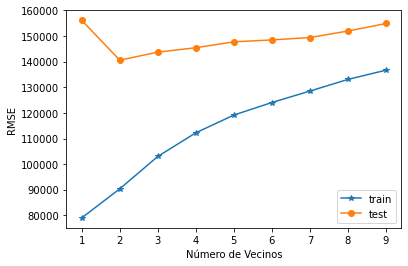

In [83]:
plt.plot(k_n, lista_recm_train_v, '-*', label='train')
plt.plot(k_n, lista_recm_test_v, 'o-',label='test' )
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('RMSE')

Vemos que la curva del set de testeo alcanza su mínimo en un número de vecinos igual a 2. Este es el valor que elegimos para entrenar el modelo.

In [84]:
from sklearn.neighbors import KNeighborsRegressor

#Creamos el modelo con un k = 2
knn_regressor = KNeighborsRegressor(n_neighbors=2)

#Entrenamos el modelo
knn_regressor.fit(X_train, y_train)

#Predecimos y evaluamos sobre el set de entrenamiento
y_train_pred_knn = knn_regressor.predict(X_train)
train_rmse_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))

#Predecimos y evaluamos sobre el set de evaluación/testeo (más realista)
y_test_pred_knn = knn_regressor.predict(X_test)
test_rmse_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))

In [85]:
print('El RMSE del set de entrenamiento del modelo de vecinos más cercanos es: ' 
      + str(round(test_rmse_knn,2)))

El RMSE del set de entrenamiento del modelo de vecinos más cercanos es: 140597.35


Hacemos el mismo análisis de los residuos del modelo.

C:\Users\ginab\anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ginab\anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


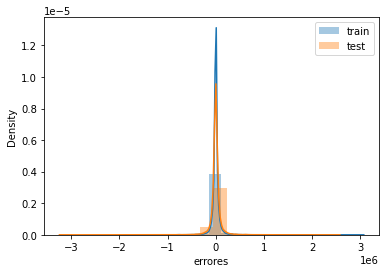

In [86]:
sns.distplot(y_train - y_train_pred_knn, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_knn, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

Text(0.5, 0, 'errores')

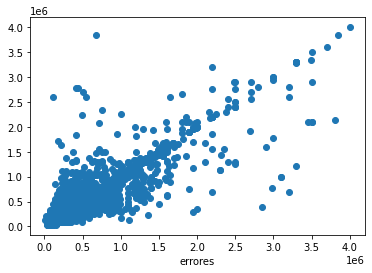

In [87]:
plt.scatter(y_test,y_test_pred_knn)
plt.xlabel('errores')

El análisis es similar aunque el leve comportamiento lineal positivo de los residuos para valores altos se acentúa en este modelo.

Vamos ahora con el **Modelo de árboles de decisión**.
Primero hacemos lo mismo que hicimos que con el modelo de vecinos más cercanos: buscamos la profundidad del árbol que minimice el RMSE.

In [88]:
from sklearn.tree import DecisionTreeRegressor

lista_rmse_train_tree = []
lista_rmse_test_tree = []

#Creamos una lista de k valores
depth = range(1,25)

for d in depth:
    
#Creamos el modelo
    tree = DecisionTreeRegressor(max_depth = d, random_state = 42)

#Lo entrenamos
    tree.fit(X_train, y_train)
    
#Predecimos sobre el set de entrenamiento
    y_train_pred = tree.predict(X_train)
    
#Lo evaluamos
    error_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
#Realizamos la predicción sobre el set de evaluación
    y_test_pred = tree.predict(X_test)
    
#Evaluamos el set de evaluación
    error_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred))

    lista_rmse_train_tree.append(error_train_tree)
    lista_rmse_test_tree.append(error_test_tree)

Graficamos esos k valores de la profundidad del arbol respecto al RMSE.

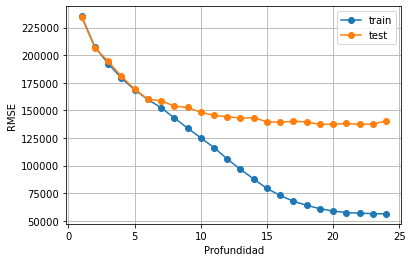

In [89]:
plt.plot(depth, lista_rmse_train_tree,'o-', label='train')
plt.plot(depth, lista_rmse_test_tree, 'o-', label='test' )
plt.legend()
plt.xlabel('Profundidad')
plt.ylabel('RMSE')
plt.grid()
plt.show()

El mínimo valor del RMSE en el conjunto de testeo se obtiene con una profundidad igual a 15, pero a partir de una profundidad de 10 u 11 el error es relativamente constante, por lo que hay que evaluar las ganancias en términos de error y performance del modelo. Asumiendo que no hay una gran pérdida de performance de todas formas me quedo con una profundidad de 15.

In [90]:
from sklearn.tree import DecisionTreeRegressor

#Creamos el modelo con una profundidad de 15
tree_regressor = DecisionTreeRegressor(max_depth = 15, random_state = 42)

#Entrenamos el modelo
tree_regressor.fit(X_train, y_train)

#Predecimos y evaluamos sobre el set de entrenamiento
y_train_pred_tree = tree_regressor.predict(X_train)
train_rmse_tree = np.sqrt(mean_squared_error(y_train, y_train_pred))

#Predecimos y evaluamos sobre el set de evaluación/testeo (más realista)
y_test_pred_tree = tree_regressor.predict(X_test)
test_rmse_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))

In [91]:
print('El RMSE del set de entrenamiento del modelo de árboles de decisión es: ' 
      + str(round(test_rmse_tree,2)))

El RMSE del set de entrenamiento del modelo de árboles de decisión es: 139635.08


Observamos gráficamente los residuos.

C:\Users\ginab\anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ginab\anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


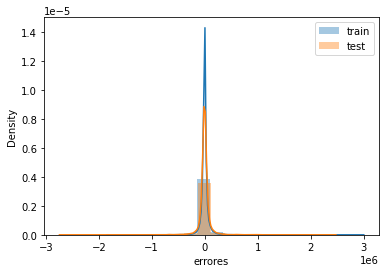

In [92]:
sns.distplot(y_train - y_train_pred_tree, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_tree, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

Text(0.5, 0, 'errores')

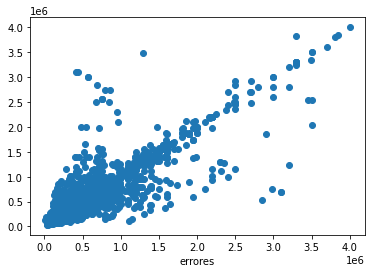

In [93]:
plt.scatter(y_test,y_test_pred_tree)
plt.xlabel('errores')

El comportamiento de los residuos es similar al de los residuos del modelo de vecinos más cercanos.

Algo **extra** que podemos analizar en el caso del modelo de árboles de decisión es la importancia que le atribuye a cada feature o variable predictora del modelo.

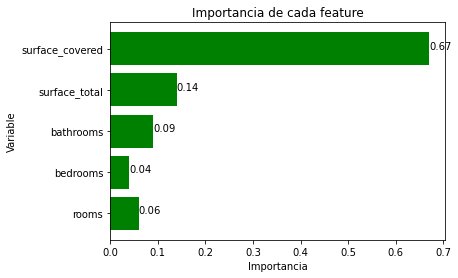

In [94]:
x = X.columns
y = tree_regressor.feature_importances_.round(2)
plt.barh(x, y, color = 'g')

for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.title('Importancia de cada feature')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

Aquellas variables de mayor importancia son la superficie total de las propiedades (principalmente) y en forma más lejana la superficie cubierta. 

Si quisieramos ver en forma compacta un histograma de los **errores** y un gráfico de los residuos de cada modelo podemos correr la siguiente línea de código.

Modelo: Regresión Lineal
Raíz del error cuadrático medio en Train: 199837.68001684517
Raíz del error cuadrático medio en Test: 201584.20024634153


C:\Users\ginab\anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ginab\anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


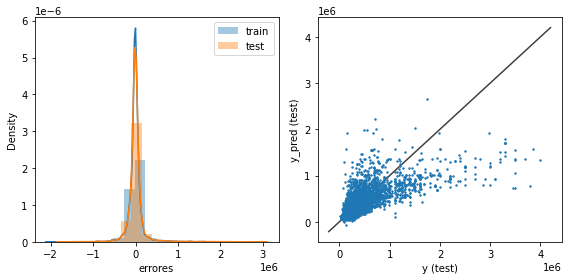

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 90325.62238457911
Raíz del error cuadrático medio en Test: 140597.34885918716


C:\Users\ginab\anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ginab\anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


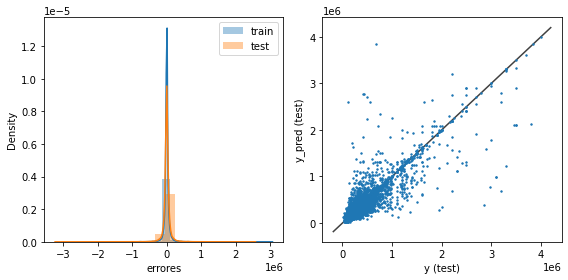

Modelo: Árboles de Decisión
Raíz del error cuadrático medio en Train: 79186.71244153088
Raíz del error cuadrático medio en Test: 139635.08190654026


C:\Users\ginab\anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ginab\anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


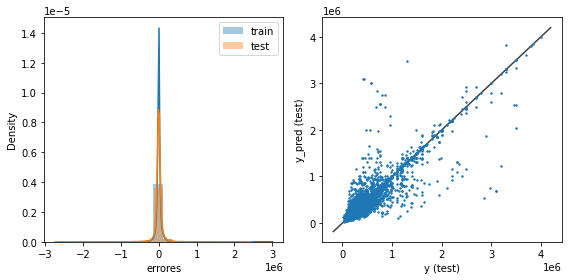

In [95]:
modelos = ['Regresión Lineal','Vecinos más cercanos','Árboles de Decisión']

for i, model in enumerate([linear_model, knn_regressor, tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Graficamos ahora los 3 RMSE obtenidos.

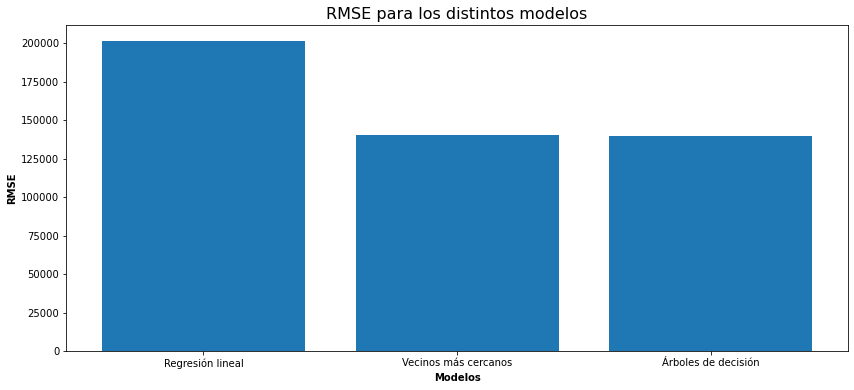

In [98]:
x = ['Regresión lineal', 'Vecinos más cercanos', 'Árboles de decisión']
errores = (test_rmse_lm, test_rmse_knn,test_rmse_tree)

plt.figure(figsize=(14, 6))
ax = plt.bar(x = x, height = errores)
plt.title('RMSE para los distintos modelos',  size = 16)
plt.xlabel("Modelos", fontweight = 'bold')
plt.ylabel("RMSE", fontweight = 'bold')
plt.show()

Observando este gráfico vemos que el modelo con error más alto es el de regresión lineal, mientras que los otros dos representan una gran mejora en términos de error respecto a éste. El menor valor de RMSE se obtiene con el modelo de árboles de decisión a pesar de que no hay grandes diferencias en este indicador entre el modelo de vecinos más cercanos y el de árboles de decisión.

Algo muy útil sería tener alguna métrica de evaluación de la performance del modelo y no del error, para ver si existe alguna diferencia significativa que nos permita elegir entre estos dos modelos.
Podemos ver qué pasa con el R2 o coeficiente de determinación de estos modelos. El R2 va de 0 a 1 y expresa el porcentaje de la variación total de Y que es explicada por el modelo de regresión. 

In [99]:
from sklearn.metrics import r2_score

r2_lm = (r2_score(y_test, y_test_pred_lm))
r2_knn = (r2_score(y_test, y_test_pred_knn))
r2_tree = (r2_score(y_test, y_test_pred_tree))

print('El R2 para el modelo de regresión es de ' + str(round(r2_lm, 4)))
print('El R2 para el modelo de vecinos más cercanos es de ' + str(round(r2_knn,4)))
print('El R2 para el modelo de árboles de decisión es de ' + str(round(r2_tree, 4)))

El R2 para el modelo de regresión es de 0.5484
El R2 para el modelo de vecinos más cercanos es de 0.7803
El R2 para el modelo de árboles de decisión es de 0.7833


Decido finalmente quedarme con el **modelo de árboles de decisión** por esa pequeña diferencia tanto en el RMSE como en el R2 respecto a los modelos restantes.

Sería útil también incorporar como variables predictoras variables que teníamos en el dataset sin filtrar. 
- Latitud y longitud pueden ser indicadoras de mayor o menor precio de las propiedades como ya vimos, además de los barrios y/o localidades (l2 y l3). 
- Podríamos incorporar información contenida en las fechas de creación y publicación de las propiedades en el sitio de Properati. Por ejemplo podemos suponer que propiedades a precios más convenientes y/o menores se venden más rápido, y aquellas con precios menos convenientes y/o mayores tardan más en venderse. 
- Podríamos diferenciar entre los tipos de propiedad y quizás hacer un análisis más detallado de aquellas diferentes a Departamentos. 
- Algo interesante a analizar podría ser utilizar aquellas columnas con texto como descripción del anuncio o título y ver si algunas palabras tienen algún grado de influencia en el tiempo de venta del anuncio, o incluso en el precio.

Considerando la alta correlación y teniendo en cuenta la importancia de estos features en el modelo de vecinos más cercanos, podría ser útil dejar de lado el análisis de la cantidad de habitaciones y sólo utilizar la cantidad de ambientes por un lado, y por otro lado, utilizar la información de superficie total y dejar de lado la superficie cubierta.